# Facial recognition Project (Traitement d'image)

## Project GOAL

The Goal of this projectis to create a model that can predicts the Person from he's face, using HOG(Histogram of oriented gradients) descriptor
, we will be using The dataset that is Called YaleFaces that consists of 15 person with 11 different images each.

### First - we import the necessary libraries

In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.feature import hog 
from skimage import io
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import cmath
import os
import itertools
import glob
import shutil

### 2  - we create a function that laods all the images from a specified directory

In [2]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = io.imread(os.path.join(folder,filename), as_gray = True)
        if img is not None:
            #img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
            images.append(img)
    return images


### 3 - we append all the images to one List to be able of splitting it

In [3]:
images_subjet1 = load_images_from_folder("yalefacesgif/subject01")
images_subjet2 = load_images_from_folder("yalefacesgif/subject02")
images_subjet3 = load_images_from_folder("yalefacesgif/subject03")
images_subjet4 = load_images_from_folder("yalefacesgif/subject04")
images_subjet5 = load_images_from_folder("yalefacesgif/subject05")
images_subjet6 = load_images_from_folder("yalefacesgif/subject06")
images_subjet7 = load_images_from_folder("yalefacesgif/subject07")
images_subjet8 = load_images_from_folder("yalefacesgif/subject08")
images_subjet9 = load_images_from_folder("yalefacesgif/subject09")
images_subjet10 = load_images_from_folder("yalefacesgif/subject10")
images_subjet11 = load_images_from_folder("yalefacesgif/subject11")
images_subjet12 = load_images_from_folder("yalefacesgif/subject12")
images_subjet13 = load_images_from_folder("yalefacesgif/subject13")
images_subjet14 = load_images_from_folder("yalefacesgif/subject14")
images_subjet15 = load_images_from_folder("yalefacesgif/subject15")

images_subjet = images_subjet1 + images_subjet2 + images_subjet3 + images_subjet4 + images_subjet5 + images_subjet6 + images_subjet7 + images_subjet8 + images_subjet9 + images_subjet10 + images_subjet11 + images_subjet12 + images_subjet13 + images_subjet14 + images_subjet15 

### 4 - Pretraitement of the images

we resize all the images so we can have a clear view to the face and the ability to deploy a nice HOG model

In [4]:
def image_resizer (listimage) :
    dim = (320 , 242)
    for i in range(len(listimage)) :
        listimage[i] = cv.resize(listimage[i],dim)
image_resizer(images_subjet)

Descriptive Vectors

We calculate The HOG for all images

In [5]:
def hog_list (listimage) :
    fv = []
    hog_image = []
    for i in range(len(listimage)) :
        a, b = hog(listimage[i], orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=False)
        fv.append(a)
        hog_image.append(b)
    return fv,hog_image

fv_images, hog_images = hog_list(images_subjet)

C:\Users\asus zephyrus\AppData\Local\Temp\ipykernel_1696\622205913.py:5: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  a, b = hog(listimage[i], orientations=9, pixels_per_cell=(8, 8),


Example of showing a picture with HOG vector

165

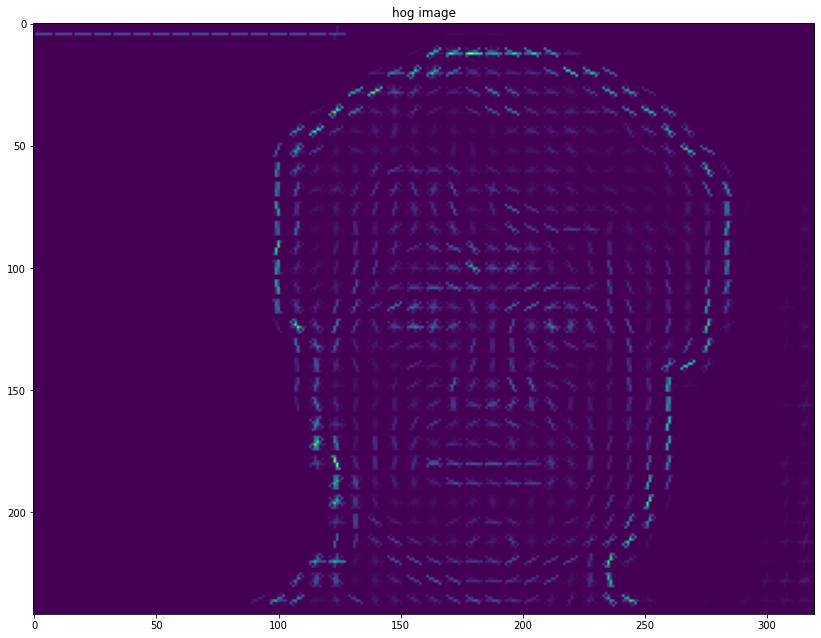

In [6]:
plt.figure(figsize=(14,12))
plt.imshow(hog_images[0]),plt.title("hog image")
len(fv_images)

We start labeling to transfer them to learning model

In [7]:
def etiquetage (listimage, etiquette) :
    etiq = []
    for i in range(len(listimage)) :
        etiq.append(etiquette)
    return etiq
etiq_sujet1 = etiquetage(images_subjet1, 1)
etiq_sujet2 = etiquetage(images_subjet2, 2)
etiq_sujet3 = etiquetage(images_subjet3, 3)
etiq_sujet4 = etiquetage(images_subjet4, 4)
etiq_sujet5 = etiquetage(images_subjet5, 5)
etiq_sujet6 = etiquetage(images_subjet6, 6)
etiq_sujet7 = etiquetage(images_subjet7, 7)
etiq_sujet8 = etiquetage(images_subjet8, 8)
etiq_sujet9 = etiquetage(images_subjet9, 9)
etiq_sujet10 = etiquetage(images_subjet10, 10)
etiq_sujet11 = etiquetage(images_subjet11, 11)
etiq_sujet12 = etiquetage(images_subjet12, 12)
etiq_sujet13 = etiquetage(images_subjet13, 13)
etiq_sujet14 = etiquetage(images_subjet14, 14)
etiq_sujet15 = etiquetage(images_subjet15, 15)

etiq_images = etiq_sujet1 + etiq_sujet2 + etiq_sujet3 + etiq_sujet4 + etiq_sujet5 + etiq_sujet6 + etiq_sujet7 + etiq_sujet8 + etiq_sujet9 + etiq_sujet10 + etiq_sujet11 + etiq_sujet12 + etiq_sujet13 + etiq_sujet14 + etiq_sujet15

In [8]:
fv_images = pd.DataFrame(fv_images)
etiq_images = np.array(etiq_images)

# KNN Algorithm

## we split the data

here the professor asked to do test_size of 4 out of 11 which is 0,36

In [9]:
4/11

0.36363636363636365

we split the data

In [10]:
fv_train, fv_test, etiq_train, etiq_test = train_test_split(fv_images, etiq_images, test_size=0.36,random_state=42) 
print("Le nombre d'échantillon d'entrainement = ",fv_train.shape)
print("Le nombre d'échantillon de test = ",fv_test.shape)

Le nombre d'échantillon d'entrainement =  (105, 40716)
Le nombre d'échantillon de test =  (60, 40716)


now we deploy the module and start predictions

[0.85, 0.85, 0.8833333333333333, 0.75, 0.7833333333333333, 0.7666666666666667, 0.7333333333333333, 0.75, 0.7333333333333333, 0.6666666666666666, 0.8166666666666667, 0.7833333333333333, 0.6166666666666667, 0.6666666666666666, 0.6833333333333333]


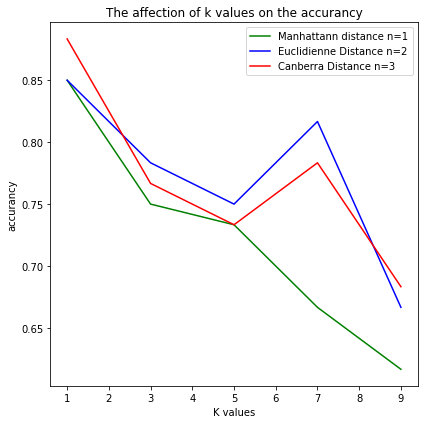

In [11]:
train_test = []
for k in range(1,10,2) :
    for i in range(1,4) : 
        voisin = KNeighborsClassifier(n_neighbors = k, p = i).fit(fv_train,etiq_train)
        ypredict = voisin.predict(fv_test)
        train_test.append(metrics.accuracy_score(etiq_test, ypredict))
print(train_test)

# On va maintenant visualiser les résultats
plt.figure(figsize=(6,6))
plt.plot(range(1,10,2),[train_test[0],train_test[3],train_test[6],train_test[9],train_test[12]],'g', label='Manhattann distance n=1')
plt.plot(range(1,10,2),[train_test[1],train_test[4],train_test[7],train_test[10],train_test[13]],'b', label='Euclidienne Distance n=2')
plt.plot(range(1,10,2),[train_test[2],train_test[5],train_test[8],train_test[11],train_test[14]],'r', label='Canberra Distance n=3')
plt.title("The affection of k values on the accurancy")
plt.legend(loc="upper right")
plt.ylabel("accurancy")
plt.xlabel("K values")
plt.tight_layout()
plt.show()

what we can see that best distance is for Canberra wtih K = 1 neighbor

In [12]:
voisin = KNeighborsClassifier(n_neighbors = 1, p = 3).fit(fv_train,etiq_train)
ypredict = voisin.predict(fv_test)
print("Confusion Matric : \n")
x = pd.DataFrame(metrics.confusion_matrix(etiq_test, ypredict))
x


Confusion Matric : 



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,4,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,2,3,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0


<AxesSubplot:title={'center':'Confusion matrix'}>

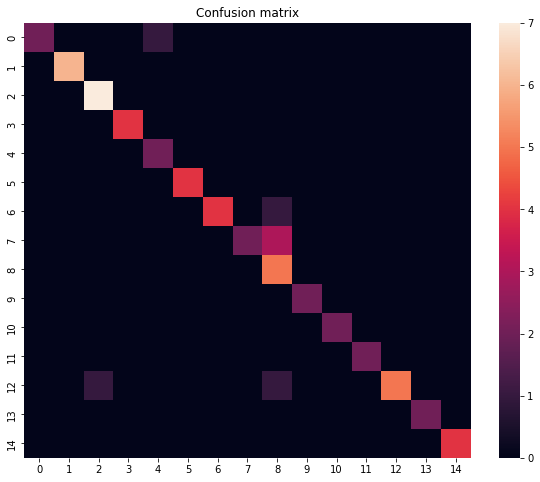

In [13]:
import seaborn as sns
plt.figure(figsize =(10,8)),plt.title("Confusion matrix")
sns.heatmap(x)

The confusion Matrix show that the predictions are close the the real data, which code precisely the Accuracy is so good : 0.85

In [14]:
# To test the performance of the models used
from sklearn import metrics
# Classification
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC


# KNN

here i deployed the same module with a different function that is faster than the original one before, iused GRIDSearch that gives you the perfect parameters directly

In [15]:

parameters = {'n_neighbors':np.arange(1,10,2), 'p' : np.arange(1,3,1)}
knn=KNeighborsClassifier()
clf = GridSearchCV(knn, parameters)
clf.fit(fv_train,etiq_train)
knn=KNeighborsClassifier(**clf.best_params_)
knn.fit(fv_train,etiq_train)

c:\Users\asus zephyrus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


KNeighborsClassifier(n_neighbors=1)

In [16]:
yknn=knn.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yknn))
print("F1-score : ", metrics.f1_score(etiq_test, yknn, average='macro'))
print(metrics.classification_report(etiq_test, yknn))

Accuracy :  0.85
F1-score :  0.8661229620053151
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         6
           3       0.70      1.00      0.82         7
           4       0.75      0.75      0.75         4
           5       1.00      1.00      1.00         2
           6       1.00      0.75      0.86         4
           7       0.80      0.80      0.80         5
           8       1.00      0.40      0.57         5
           9       0.57      0.80      0.67         5
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      0.86      0.92         7
          14       0.67      1.00      0.80         2
          15       1.00      1.00      1.00         4

    accuracy                           0.85        60
   macro avg       0.90      0.8

# SVM

I know that this wasn't asked, but i tried to deploy an SVM Module just to see how would it react

In [17]:
parameters = {'degree':np.arange(1,10,1)}
svm=SVC(gamma='scale', class_weight='balanced')
clf = GridSearchCV(svm, parameters)
clf.fit(fv_train,etiq_train)
svm=SVC(**clf.best_params_)
svm.fit(fv_train,etiq_train)
ysvm=svm.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, ysvm))
print("F1-score : ",metrics.f1_score(etiq_test, ysvm, average='macro'))

c:\Users\asus zephyrus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Accuracy :  0.7166666666666667
F1-score :  0.7337510637510639


the precision was not that bad but 0.71

# NN

Using Neural networks, here i used The following module with 3 different Hidden layers and tanh as an activation key, i played the parameters sometimes i get really bad precision like 0.26 and sometimes around 59, until i got the best combination with a precision = 0.96

In [18]:
mlp = MLPClassifier(solver='adam', alpha=1e-6, activation='tanh', max_iter = 2500 , hidden_layer_sizes=(44,27,26), random_state=42).fit(fv_train,etiq_train)
ymlp = mlp.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, ymlp))
print("F1-score : ",metrics.f1_score(etiq_test, ymlp, average='macro'))

Accuracy :  0.9666666666666667
F1-score :  0.9754778554778555


SOWEEEEETTT RESAULT

In [19]:

taillecouche = list()
performance = list()
for couche1 in range(43,45) :
    for couche2 in range(26,28) :
        for couche3 in range(25,27) :
            modele = MLPClassifier(solver='adam', alpha=1e-6, activation='tanh', max_iter = 1500 , hidden_layer_sizes=(couche1,couche2,couche3), random_state=1).fit(fv_train,etiq_train)
            taillecouche.append((couche1,couche2,couche3))
            performance.append((metrics.accuracy_score(etiq_train, modele.predict(fv_train)), modele.score(fv_test,etiq_test)))
len(performance)

8

Here i used loops to append the perfomance just to plot how would changing parameters affect the precision

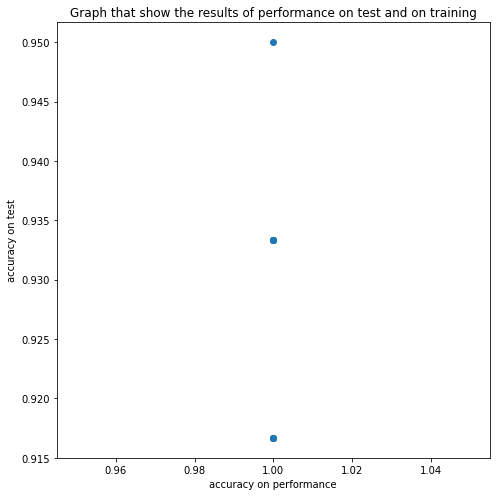

Best Test resault :  0.95


In [20]:
x, y = zip(*performance)
plt.figure(figsize=(7,7))
plt.scatter(x, y)
plt.title("Graph that show the results of performance on test and on training")
plt.ylabel("accuracy on test")
plt.xlabel("accuracy on performance")
plt.tight_layout()
plt.show()
print("Best Test resault : ",max(y))

The comparision between KNN and Neural networks is so clear, as the resaaults shown up NN gave a much better resault than the KNN module, classification with Neural networks takes time but gives a much better resaults